### Run in python console
import nltk; nltk.download('stopwords')

### Run in terminal or command prompt
python3 -m spacy download en

### Import Packages

The core packages used in this tutorial are re, gensim, spacy and pyLDAvis. Besides this we will also using matplotlib, numpy and pandas for data handling and visualization. Let’s import them.

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [2]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel # https://radimrehurek.com/gensim/models/coherencemodel.html

In [3]:
# Spacy for lemmatization
import spacy

#Plotting tools # conda install -c memex pyldavis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

#### import data

In [39]:
# dataframe = pd.read_json('newsgroups.json')
# dataframe.head()

dataframe = pd.read_csv('voted-kaggle-dataset.csv')
dataframe.head()

Title  \
0  Credit Card Fraud Detection   
1     European Soccer Database   
2      TMDB 5000 Movie Dataset   
3    Human Resources Analytics   
4    Global Terrorism Database   

                                            Subtitle  \
0  Anonymized credit card transactions labeled as...   
1  25k+ matches, players & teams attributes for E...   
2                Metadata on ~5,000 movies from TMDb   
3  Why are our best and most experienced employee...   
4  More than 170,000 terrorist attacks worldwide,...   

                          Owner  Votes Last Update  \
0  Machine Learning Group - ULB   1233  2016-11-05   
1                  Hugo Mathien   1035  2016-10-24   
2     The Movie Database (TMDb)   1018  2017-09-28   
3             Ludovic Benistant    832  2016-11-30   
4              START Consortium    785  2017-07-19   

                                        Tags Data Type    Size License  \
0                             crime\nfinance       CSV  144 MB    ODbL   
1               association football\neurope    SQLite  299 MB    ODbL   
2                                       film       CSV   44 MB   Other   
3                                 employment       CSV  553 KB     CC4   
4  crime\nterrorism\ninternational relations       CSV  144 MB   Other   

           Views          Download        Kernels     Topics  \
0  440,221 views  52,793 downloads  1,778 kernels  26 topics   
1  393,924 views  46,025 downloads  1,459 kernels  75 topics   
2  444,535 views  61,705 downloads  1,394 kernels  46 topics   
3  309,644 views  47,350 downloads  1,772 kernels  32 topics   
4  186,621 views  26,091 downloads    609 kernels  11 topics   

                                                 URL  \
0     https://www.kaggle.com/mlg-ulb/creditcardfraud   
1          https://www.kaggle.com/hugomathien/soccer   
2    https://www.kaggle.com/tmdb/tmdb-movie-metadata   
3  https://www.kaggle.com/ludobenistant/hr-analytics   
4               https://www.kaggle.com/START-UMD/gtd   

                                         Description  
0  The datasets contains transactions made by cre...  
1  The ultimate Soccer database for data analysis...  
2  Background\nWhat can we say about the success ...  
3  This dataset is simulated\nWhy are our best an...  
4  Context\nInformation on more than 170,000 Terr...

In [40]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [50]:
# Convert to list
data = dataframe.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['The datasets contains transactions made by credit cards in September 2013 by '
 'european cardholders. This dataset presents transactions that occurred in '
 'two days, where we have 492 frauds out of 284,807 transactions. The dataset '
 'is highly unbalanced, the positive class (frauds) account for 0.172% of all '
 'transactions.\n'
 'It contains only numerical input variables which are the result of a PCA '
 'transformation. Unfortunately, due to confidentiality issues, we cannot '
 'provide the original features and more background information about the '
 'data. Features V1, V2, ... V28 are the principal components obtained with '
 "PCA, the only features which have not been transformed with PCA are 'Time' "
 "and 'Amount'. Feature 'Time' contains the seconds elapsed between each "
 "transaction and the first transaction in the dataset. The feature 'Amount' "
 'is the transaction Amount, this feature can be used for example-dependant '
 "cost-senstive learning. Feature 'Class' is

 'uploaded by DrGuillermo and decided to create and share a dataset that would '
 'be similar but would also add something extra.\n'
 'Acknowledgements\n'
 'If you use The YouTube Faces Dataset, or refer to its results, please cite '
 'the following paper:\n'
 'Lior Wolf, Tal Hassner and Itay Maoz\n'
 'Face Recognition in Unconstrained Videos with Matched Background '
 'Similarity.\n'
 'IEEE Conf. on Computer Vision and Pattern Recognition (CVPR), 2011. (pdf)\n'
 'if you use the 2D or 3D keypoints, or refer to its results, please cite the '
 'following paper:\n'
 'Adrian Bulat and Georgios Tzimiropoulos.\n'
 'How far are we from solving the 2D & 3D Face Alignment problem?\n'
 '(and a dataset of 230,000 3D facial landmarks), arxiv, 2017. (pdf)\n'
 'Also, I would like to thank Gil Levi for pointing out YouTube Faces to me a '
 'few years back.\n'
 'Inspiration\n'
 'The YouTube Faces Dataset was originally intended to be used for face '
 'recognition across videos, i.e. given two videos, 

 'Context\n'
 'Music streaming is ubiquitous. Currently, Spotify plays an important part on '
 "that. This dataset enable us to explore how artists and songs' popularity "
 'varies in time.\n'
 'Content\n'
 'This dataset contains the daily ranking of the 200 most listened songs in 53 '
 'countries from 2017 and 2018 by Spotify users. It contains more than 2 '
 'million rows, which comprises 6629 artists, 18598 songs for a total count of '
 'one hundred five billion streams count.\n'
 'The data spans from 1st January 2017 to 9th January 2018 and will be kept '
 "up-to-date on following versions. It has been collected from Spotify's "
 'regional chart data.\n'
 'Inspiration\n'
 'Can you predict what is the rank position or the number of streams a song '
 'will have in the future?\n'
 'How long does songs "resist" on the top 3, 5, 10, 20 ranking?\n'
 'What are the signs of a song that gets into the top rank to stay?\n'
 'Do continents share same top ranking artists or songs?\n'
 'Are peop

 'Yahoo.\n'
 'It also contains a lot of U. S President Donald Trump allies including Rax '
 'Tillerson, Wilbur Ross, Koch Brothers, Paul Singer, Sheldon Adelson, Stephen '
 'Schwarzman, Thomas Barrack and Steve Wynn etc. The complete list of '
 'Politicians involve is avaiable here.\n'
 'The Panama Papers in the cache of 38GB of data from the national corporate '
 'registry of Bahamas. It contains world’s top politicians and influential '
 'persons as head and director of offshore companies registered in Bahamas.\n'
 'Offshore Leaks details 13,000 offshore accounts in a report.\n'
 'I am calling all data scientists to help me stop the corruption and reveal '
 'the patterns and linkages invisible for the untrained eye.\n'
 'Content\n'
 'The data is the effort of more than 100 journalists from 60+ countries\n'
 'The original data is available under creative common license and can be '
 'downloaded from this link.\n'
 'I will keep updating the datasets with more leaks and data as it’s '
 

 'Context\n'
 "There are all sorts of reasons why you'd want to know a hospital's quality "
 'rating.\n'
 'Your mom is having her second hip replacement. Her first one went terribly '
 "and you're nervous about how she'll do. Which hospital would you suggest she "
 'have her surgery?\n'
 "You're selecting a health plan on your state's Exchange, but your top two "
 'choices partner with different hospitals. How will you decide which plan to '
 'pick?\n'
 'Your brother has Cystic Fibrosis and has to go to the ER frequently. He '
 'hates waiting. Which hospitals/states provide care in the timeliest manner?\n'
 'Your in-laws moved to Florida recently to retire, and have been trying to '
 "convince you to move there too. You're looking for any way possible to show "
 'them that your state is better. Does your state have better hospitals?\n'
 'Every hospital in the United States of America that accepts publicly insured '
 'patients (Medicaid or MediCare) is required to submit quality data, '

 'Context\n'
 'The ecological footprint measures the ecological assets that a given '
 'population requires to produce the natural resources it consumes (including '
 'plant-based food and fiber products, livestock and fish products, timber and '
 'other forest products, space for urban infrastructure) and to absorb its '
 'waste, especially carbon emissions. The footprint tracks the use of six '
 'categories of productive surface areas: cropland, grazing land, fishing '
 'grounds, built-up (or urban) land, forest area, and carbon demand on land.\n'
 'A nation’s biocapacity represents the productivity of its ecological assets, '
 'including cropland, grazing land, forest land, fishing grounds, and built-up '
 'land. These areas, especially if left unharvested, can also absorb much of '
 'the waste we generate, especially our carbon emissions.\n'
 'Both the ecological footprint and biocapacity are expressed in global '
 'hectares — globally comparable, standardized hectares with world a

 'Introduction\n'
 'Flaredown is an app that helps patients of chronic autoimmune and invisible '
 'illnesses improve their symptoms by avoiding triggers and evaluating their '
 'treatments. Each day, patients track their symptom severity, treatments and '
 'doses, and any potential environmental triggers (foods, stress, allergens, '
 'etc) they encounter.\n'
 'About the data\n'
 'Instead of coupling symptoms to a particular illness, Flaredown asks users '
 'to create their unique set of conditions, symptoms and treatments '
 '(“trackables”). They can then “check-in” each day and record the severity of '
 'symptoms and conditions, the doses of treatments, and “tag” the day with any '
 'unexpected environmental factors.\n'
 'User: includes an ID, age, sex, and country.\n'
 'Condition: an illness or diagnosis, for example Rheumatoid Arthritis, rated '
 'on a scale of 0 (not active) to 4 (extremely active).\n'
 'Symptom: self-explanatory, also rated on a 0–4 scale.\n'
 'Treatment: anythin

 'Context\n'
 'This corpus contains 5001 female names and 2943 male names, sorted '
 'alphabetically, one per line created by Mark Kantrowitz and redistributed in '
 'NLTK.\n'
 'The names.zip file includes\n'
 'README: The readme file.\n'
 'female.txt: A line-delimited list of words.\n'
 'male.txt: A line-delimited list of words.\n'
 'License/Usage\n'
 'Names Corpus, Version 1.3 (1994-03-29)\n'
 'Copyright (C) 1991 Mark Kantrowitz\n'
 'Additions by Bill Ross\n'
 '\n'
 'This corpus contains 5001 female names and 2943 male names, sorted\n'
 'alphabetically, one per line.\n'
 '\n'
 'You may use the lists of names for any purpose, so long as credit is\n'
 'given in any published work. You may also redistribute the list if you\n'
 'provide the recipients with a copy of this README file. The lists are\n'
 'not in the public domain (I retain the copyright on the lists) but are\n'
 'freely redistributable.  If you have any additions to the lists of\n'
 'names, I would appreciate receiving them

 'Context\n'
 'This is a dataset that I built by scraping the United States Department of '
 "Labor's Bureau of Labor Statistics. I was looking for county-level "
 'unemployment data and realized that there was a data source for this, but '
 "the data set itself hadn't existed yet, so I decided to write a scraper and "
 'build it out myself.\n'
 'Content\n'
 'This data represents the Local Area Unemployment Statistics from 1990-2016, '
 'broken down by state and month. The data itself is pulled from this mapping '
 'site:\n'
 'https://data.bls.gov/map/MapToolServlet?survey=la&map=county&seasonal=u\n'
 'Further, the ever-evolving and ever-improving codebase that pulled this data '
 'is available here:\n'
 'https://github.com/jayrav13/bls_local_area_unemployment\n'
 'Acknowledgements\n'
 'Of course, a huge shoutout to bls.gov and their open and transparent data. '
 "I've certainly been inspired to dive into US-related data recently and "
 'having this data open further enables my curiosi

 'Context\n'
 'Data Scientists often use crowdsourcing platforms, such as Amazon Mechanical '
 'Turk or CrowdFlower to collect labels for their data. Controlling high '
 'quality and timeless execution of tasks is an important part of such '
 'collection process. It is not possible (or not efficient) to manually check '
 'every worker assignment. There is an intuition that there quality could be '
 'predicted based on workers task browser behaviour (e.g. key presses, '
 'scrolling, mouse clicks, tab switching). In this dataset there are '
 'assignment results for 3 different crowdsourcing tasks launched on '
 'CrowdFlower, along with associated workers behaviour.\n'
 'Content\n'
 'We collected data running 3 tasks:\n'
 'Image labelling,\n'
 'Receipt Transcription,\n'
 'Business Search.\n'
 'Tasks are described in tasks.csv. Results for corresponding tasks are given '
 "in files: results_{task_id}.csv. Workers's activity could be found in the "
 'following files:\n'
 'activity_keyboard.

 'Content\n'
 'Attached is a list of Twitter users who regularly report on natural and '
 'man-made disasters, violence or crime. The accounts may belong to '
 'journalists, news media, local fire or police departments, other local '
 'authorities, or disaster monitors. Disaster reporting may not be the primary '
 'function of the accounts, nevertheless they are a prolific source of '
 'disaster/accident reporting, especially at the location they are associated '
 'with.\n'
 'Background\n'
 'Details of the curation of this dataset, once published, will be added to '
 'this entry.\n'
 'Disclaimer\n'
 'The dataset does not include a measure of credibility for the users. The '
 'stories reported by them may or may not be true. Further vetting and '
 'verification is required to confirm if the stories that they report are '
 'credible.',
 'Context\n'
 "These data are from a couple of sensors of my dad's house.\n"
 'Content\n'
 'The data are from motion sensors at the front door, which also

 '2017", "President Donald Trump\'s First 100 Days | NBC News", "Donald Trump '
 'Rally Speech Events Press Conference Rallies Playlist".\n'
 'This dataset consists of a single CSV file MrTrumpSpeeches.csv. The columns '
 "are: 'id', 'playlist', 'upload_date', 'title', 'view_count', "
 "'average_rating', 'like_count', 'dislike_count', 'subtitles', which are "
 "delimited with tilde character '~'.\n"
 "Text data in columns 'subtitles' is not sentence based, there are not commas "
 'or dots. It is only stream of words being translated from speech into text '
 'by GoogleVoice (more here '
 'https://googleblog.blogspot.com.au/2009/11/automatic-captions-in-youtube.html).\n'
 'Acknowledgements:\n'
 'The data was downloaded using youtube-dl package.\n'
 'Inspiration:\n'
 "I'm interested in psychological profiles of people speaking based on "
 'language used. (For example see '
 'https://medium.com/@TSchnoebelen/trump-does-not-talk-like-a-woman-breaking-news-gender-continues-to-be-complicated-

 'Context:\n'
 'Signed languages have many unique ways to encode meaning. Some of these ways '
 'include using different handshapes, motions, which direction the palm and '
 'wrist are facing, whether one hand or two is used, and facial expressions. '
 'This dataset compares which different sign languages use which of these '
 'grammatical building blocks.\n'
 'Content:\n'
 'This database contains information on the parameters used by 87 signed '
 'languages, taken from various academic sources and compiled by hand.\n'
 'Acknowledgements:\n'
 'This dataset was collected by Rachael Tatman during the process of '
 'linguistic research and is released to the public domain. The database can '
 'be cited by reference to this paper:\n'
 'Tatman, R. (2015). The Sign Language Analyses (SLAY) Database⋆ (Vol. 33). '
 'University of Washington Working Papers in Linguistics. '
 'https://depts.washington.edu/uwwpl/vol33/2-Tatman-SLAY.pdf\n'
 'Inspiration:\n'
 'One analysis of this data is presented

 'respect, his age gap seemingly mirrors and confirms the larger critique of '
 'Hollywood’s bias against older actresses (as gestured towards by the '
 'brilliant work of the folks at Time and The Pudding).\n'
 'I am not a numbers person by any stretch and have no experience handling '
 'data let alone analyzing and visualizing it. But I did make this hilariously '
 "crude google doc and that's got to count for something. If you're curious "
 "about methodology, it's specified at the tail end of the article.",
 'Context\n'
 'This data set contains the acquired time series from 16 chemical sensors '
 'exposed to gas mixtures at varying concentration levels. In particular, we '
 'generated two gas mixtures: Ethylene and Methane in air, and Ethylene and CO '
 'in air. Each measurement was constructed by the continuous acquisition of '
 'the 16-sensor array signals for a duration of about 12 hours without '
 'interruption.\n'
 'The data set was collected in a gas delivery platform facilit

 'time and compute resources to learn a lot of features and your model will '
 'likely benefit from it.',
 'ResNet-101\n'
 'Deep Residual Learning for Image Recognition\n'
 'Deeper neural networks are more difficult to train. We present a residual '
 'learning framework to ease the training of networks that are substantially '
 'deeper than those used previously. We explicitly reformulate the layers as '
 'learning residual functions with reference to the layer inputs, instead of '
 'learning unreferenced functions. We provide comprehensive empirical evidence '
 'showing that these residual networks are easier to optimize, and can gain '
 'accuracy from considerably increased depth. On the ImageNet dataset we '
 'evaluate residual nets with a depth of up to 152 layers---8x deeper than VGG '
 'nets but still having lower complexity.\n'
 'An ensemble of these residual nets achieves 3.57% error on the ImageNet test '
 'set. This result won the 1st place on the ILSVRC 2015 classification t

 'REPRESENTATIVE information for the application.\n'
 'The attorney-docket-number element is optional and occurs zero or one times '
 'between the attorney-docket-number start and attorney-docket-number end tags '
 'containing the ATTORNEY DOCKET NUMBER, a twelve-position number containing '
 'the reference or identification number of a case as assigned and used in the '
 'office of the attorney filing the application.\n'
 'The attorney-name element is optional and occurs zero or one times between '
 'the attorney-name start and attorney-name end tags and contains the ATTORNEY '
 'information from the OWNX record.\n'
 'The principal-register-amended-indicator element is optional and occurs zero '
 'or one times between the principal-register-amended-in start and '
 'principal-register-amended-in end tags containing the FLAG AMENDED TO THE '
 'PRINCIPAL REGISTER, a one-position alphabetic indicating the register has '
 'been amended for an application on the Supplemental Register. A “T”

 '}\n'
 'References:\n'
 'Steven Abney and Steven Bird. 2010. The Human Language \n'
 'Project: Building a universal corpus of the world’s languages. \n'
 'In Proceedings of the 48th Annual Meeting of the Association \n'
 'for Computational Linguistics, pages 88–97.\n'
 '\n'
 'Sime Ager. Omniglot - writing systems and languages \n'
 'of the world. Retrieved from www.omniglot.com.\n'
 '\n'
 'William D Lewis and Fei Xia. 2010. Developing ODIN: A multilingual \n'
 'repository of annotated language data for hundreds of the world’s \n'
 'languages. Literary and Linguistic Computing, 25(3):303–319.\n'
 '\n'
 'UN General Assembly, Universal Declaration of Human Rights, \n'
 '10 December 1948, 217 A (III), available at: \n'
 'http://www.refworld.org/docid/3ae6b3712c.html \n'
 '[accessed 26 April 2014]\n'
 'Inspiration\n'
 'This corpus was created in a span a semester in Saarland University by a '
 'linguist, a mathematician, a data geek and two amazing mentors from the COLI '
 "department. It 

 'in order to create valid predictions for football (soccer) match outcomes. '
 'Hence I created a dataset consisting of historic match data for the German '
 'Bundesliga (1st and 2nd Division) as well as the English Premier League '
 'reaching back as far as 1993 up to 2016. Besides the mere information '
 'concerning goals scored and home/draw/away win the dataset also includes per '
 'site (team) data such as transfer value per team (pre-season), the squad '
 'strength, etc. Unfortunately I was only able to find sources for these '
 'advanced attributes going back to the 2005 season.\n'
 'I have used this dataset with different machine learning algorithms '
 'including random forests, XGBoost as well as different recurrent neural '
 'network architectures (in order to potentially identify recurring patterns '
 "in winning streaks, etc.). I'd like to share the approaches I used as "
 'separate Kernels here as well. So far I did not manage to exceed an accuracy '
 'of 53% consistently

 'As I am trying to learn and build an LSTM prediction model for equity '
 'prices, I have chosen gold price to begin.\n'
 'Content\n'
 'The file composed of simply 2 columns. One is the date (weekend) and the '
 'other is gold close price. The period is from 2015-01-04 to 2017-09-24.\n'
 'Acknowledgements\n'
 'Thanks to Jason of his tutorial about LSTM forecast: '
 'https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/\n'
 'Inspiration\n'
 'William Gann: Time is the most important factor in determining market '
 'movements and by studying past price records you will be able to prove to '
 'yourself history does repeat and by knowing the past you can tell the '
 'future. There is a definite relation between price and time.',
 'Context\n'
 'Before joining the federal executive administration, new government '
 'appointees must submit, amongst other things, detailed information regarding '
 'their finances and previous job history. Such disclos

 'datasets on Kaggle yet! This one is small, but better than nothing! It '
 'contains the location coordinates of chests in Fortnite: Battle Royale as of '
 'the 1st of December 2017.\n'
 'Content\n'
 'There are three columns in the dataset. The first one has an identifier '
 'which is a running number starting from 1. The second column has latitudinal '
 'coordinates for chests. The third column has longitudinal coordinates for '
 'chests.\n'
 'Acknowledgements\n'
 'The data originates from: http://www.fortnitechests.info/ which is updated '
 'by SoumyDev (soumyydev@gmail.com)\n'
 'Neither SoumyDev or the uploader of this dataset are affiliated with Epic '
 'Games or any of his partners. All copyrights reserved to their respective '
 'owners.\n'
 'Inspiration\n'
 'Based on chest coordinates, what are the best clusters to land on at the '
 'beginning of the match?',
 'Context\n'
 'This dataset provides the nationalities of passengers on the Titanic. It is '
 'meant to be merged with th

 'Sachiemon\n'
 'Sachin Kalsi\n'
 'Sachin Patel\n'
 'sachinumrao\n'
 'SadhanaSingh\n'
 'Safecast\n'
 'Sagar Sarkar\n'
 'Sagarnil Das\n'
 'SagarSen\n'
 'Sahil Gandhi\n'
 'Sai C\n'
 'Sai Pranav\n'
 'Saida Antonyan\n'
 'saigonapps\n'
 'saikiran\n'
 'SaiKumar\n'
 'Saimagesh R\n'
 'sainath\n'
 'Saiprasad\n'
 'Sajal\n'
 'Sajid\n'
 'SakinaDas\n'
 'SakthiSiva\n'
 'Sakti Prasad\n'
 'Salil Gautam\n'
 'Salim Dohri\n'
 'SalimChouai\n'
 'salmanpathan\n'
 'Salomon\n'
 'SalvadorDali\n'
 'Sam Edelstein\n'
 'Sam Harris\n'
 'sam komo\n'
 'Sam Shideler\n'
 'Sam Stonesifer\n'
 'Sam Wong\n'
 'samael\n'
 'SambitSekhar\n'
 'samdeeplearning\n'
 'SamDotson\n'
 'Sameer Mahajan\n'
 'Sameer\n'
 'Sami Rahman\n'
 'SamiraKlaylat\n'
 'SamiTabet\n'
 'Sammy Klasfeld\n'
 'sammy123\n'
 'Samrat\n'
 'Samriddhi Sinha\n'
 'Samuel Longwell\n'
 'Samuel\n'
 'Samyak Jain\n'
 'SanD\n'
 'Sandeep Kumar\n'
 'Sandeep\n'
 'SandeepRamesh\n'
 'SandeepYadav\n'
 'sandhya raghavan\n'
 'Sandra Cristina Bustos Galvis\n'
 'sandrarivera\n'
 'S

 'MXBean(com.bea:Name=JmsDispatcher,ServerRuntime=i0_lphost06,Type=WorkManagerRuntime).StuckThreadCount\n'
 'MXBean(com.bea:Name=OneWayJTACoordinatorWM,ServerRuntime=i0_lphost06,Type=WorkManagerRuntime).StuckThreadCount\n'
 'MXBean(com.bea:Name=ThreadPoolRuntime,ServerRuntime=i0_lphost06,Type=ThreadPoolRuntime).StuckThreadCount\n'
 'MXBean(com.bea:Name=UserLockout,ServerRuntime=i0_lphost06,Type=WorkManagerRuntime).StuckThreadCount\n'
 'MXBean(com.bea:Name=direct,ServerRuntime=i0_lphost06,Type=WorkManagerRuntime).StuckThreadCount\n'
 'MXBean(com.bea:Name=i0_lphost06,Type=Server).StuckThreadMaxTime\n'
 'MXBean(com.bea:Name=i0_lphost06,Type=Server).StuckThreadTimerInterval\n'
 'MXBean(com.bea:Name=i0_lphost07,Type=Server).StuckThreadMaxTime\n'
 'MXBean(com.bea:Name=i0_lphost07,Type=Server).StuckThreadTimerInterval\n'
 'MXBean(com.bea:Name=i0_lphost08,Type=Server).StuckThreadMaxTime\n'
 'MXBean(com.bea:Name=i0_lphost08,Type=Server).StuckThreadTimerInterval\n'
 'MXBean(com.bea:Name=i0_lphos

 'Context\n'
 'Paleobiology is a growing and comparatively new discipline which combines '
 'the methods and findings of the natural science biology with the methods and '
 'findings of the earth science paleontology. It is occasionally referred to '
 'as "geobiology".\n'
 'Paleobiological research uses biological field research of current biota and '
 'of fossils millions of years old to answer questions about the molecular '
 'evolution and the evolutionary history of life.\n'
 'Content\n'
 'The content is a database that makes up about 500 million years of evolution '
 'in North America (will be adding the world later). Which happens to include '
 'collection-based occurrence and taxonomic data for organism of all '
 'geological ages. In short, DINOSAURS!!!\n'
 'The dataset started in 1998 through funding from the National Center for '
 'Ecological Analysis and Synthesis. Funding continued in the year 2000 and on '
 'through funding from US National Science Foundation as well as the

In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]


In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp_posting_host', 'rac_wam_umd_edu', 'organization', 'university', 'of', 'maryland_college_park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front_bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']


### remove the stopwords

In [11]:
def remove_stop_words(texts):
    nostop_data_words = list()
    for doc in texts:
        data = list()
        for word in simple_preprocess(str(doc)):
            if word not in stop_words:
               data.append(word)
        nostop_data_words.append(data)
    
    return nostop_data_words
    

#### make bigram, trigram

In [12]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]


def make_trigram(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
    

### lemmatization

In [13]:
def lemmatization(texts, allowed_postags):
    texts_output = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    return texts_output



In [14]:
nostop_data_words = remove_stop_words(data_words)
print(nostop_data_words[:1])
data_words_bigram = make_bigrams(nostop_data_words)

data_lemma = lemmatization(texts = data_words_bigram, allowed_postags=['NOUN','ADJ','VERB','ADV'])

[['wheres', 'thing', 'car', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'door', 'sports', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'doors', 'really', 'small', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'production', 'car', 'made', 'history', 'whatever', 'info', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'neighborhood', 'lerxst']]


In [15]:
print(data_lemma[:1])

[['where', 's', 'thing', 'car', 'nntp_post', 'host', 'rac_wam', 'umd', 'organization', 'university', 'maryland_college', 'park', 'line', 'wonder', 'anyone', 'could', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'bricklin', 'door', 'really', 'small', 'addition', 'front_bumper', 'separate', 'rest', 'body', 'know', 'anyone', 'tellme', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'whatev', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


#### Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

In [16]:
# Create dictionary
# This is used as the input by the LDA model.
id2word = corpora.Dictionary(data_lemma)
texts = data_lemma
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]]


In [17]:
id2word[0]

'addition'

#### # Human readable format of corpus (term-frequency)

In [18]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('addition', 1),
  ('anyone', 2),
  ('body', 1),
  ('bricklin', 1),
  ('bring', 1),
  ('call', 1),
  ('car', 5),
  ('could', 1),
  ('day', 1),
  ('door', 2),
  ('early', 1),
  ('engine', 1),
  ('enlighten', 1),
  ('front_bumper', 1),
  ('funky', 1),
  ('history', 1),
  ('host', 1),
  ('info', 1),
  ('know', 1),
  ('late', 1),
  ('lerxst', 1),
  ('line', 1),
  ('look', 2),
  ('mail', 1),
  ('make', 1),
  ('maryland_college', 1),
  ('model', 1),
  ('name', 1),
  ('neighborhood', 1),
  ('nntp_post', 1),
  ('organization', 1),
  ('park', 1),
  ('production', 1),
  ('rac_wam', 1),
  ('really', 1),
  ('rest', 1),
  ('s', 1),
  ('see', 1),
  ('separate', 1),
  ('small', 1),
  ('spec', 1),
  ('sport', 1),
  ('tellme', 1),
  ('thank', 1),
  ('thing', 1),
  ('umd', 1),
  ('university', 1),
  ('whatev', 1),
  ('where', 1),
  ('wonder', 1),
  ('year', 1)]]

In [19]:
# Build LDA model
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=corpus,
                id2word=id2word,
                num_topics=20, 
                random_state=100,
                update_every=1,
                chunksize=100,
                passes=10,
                alpha='auto',
                per_word_topics=True)

In [20]:
from gensim.test.utils import datapath
model_name = '/home/akash/Dev/Topic modeling/LDA_model'
temp_file = datapath(model_name)

# Save model to disk.
lda_model.save(temp_file)

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [21]:
# Load a potentially pretrained model from disk.
lda_model = LDA.load(temp_file)

In [23]:
# https://rare-technologies.com/what-is-topic-coherence/

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# a measure of how good the model is. lower the better.
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 


Coherence Score:  0.5152202258019667

Perplexity:  -8.754131046059092


In [24]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.337053 -0.001276       1        1  16.268135
13     0.291111 -0.003084       2        1  15.230650
18     0.328785 -0.128180       3        1  14.557238
2      0.091687  0.226496       4        1   6.162424
15     0.059670  0.222631       5        1   5.974451
10    -0.084997 -0.112863       6        1   4.344129
17     0.061019 -0.182957       7        1   4.177610
12    -0.022530 -0.036434       8        1   3.585788
5     -0.022912 -0.021209       9        1   3.365932
16    -0.029336  0.219725      10        1   3.271603
6     -0.062707 -0.017222      11        1   3.227843
9     -0.062886  0.139497      12        1   2.969469
14    -0.088862 -0.062628      13        1   2.741142
3     -0.047743 -0.117469      14        1   2.731833
8     -0.111487  0.003675      15        1   2.291085
19    -0.113655 -0.023387      16        1   2.124106
11    -0.092187 -0.110806      17        1   2.081675
4     -0.134209  0.001553      18        1   1.693963
0     -0.164193 -0.028033      19        1   1.679180
1     -0.131621  0.031970      20        1   1.521736, topic_info=      Category          Freq          Term         Total  loglift  logprob
4146   Default  57084.000000            ax  57084.000000  30.0000  30.0000
21     Default  12491.000000          line  12491.000000  29.0000  29.0000
82     Default  16295.000000           not  16295.000000  28.0000  28.0000
30     Default  11141.000000  organization  11141.000000  27.0000  27.0000
3721   Default   3845.000000           max   3845.000000  26.0000  26.0000
65     Default  10455.000000            do  10455.000000  25.0000  25.0000
322    Default   9655.000000         write   9655.000000  24.0000  24.0000
55     Default   7586.000000       article   7586.000000  23.0000  23.0000
244    Default   8048.000000            be   8048.000000  22.0000  22.0000
154    Default  11783.000000         would  11783.000000  21.0000  21.0000
303    Default   6906.000000           say   6906.000000  20.0000  20.0000
226    Default   5804.000000            go   5804.000000  19.0000  19.0000
29     Default   4407.000000     nntp_post   4407.000000  18.0000  18.0000
16     Default   4083.000000          host   4083.000000  17.0000  17.0000
118    Default   6852.000000           get   6852.000000  16.0000  16.0000
46     Default   5027.000000    university   5027.000000  15.0000  15.0000
1911   Default   1863.000000         space   1863.000000  14.0000  14.0000
215    Default   2294.000000        window   2294.000000  13.0000  13.0000
36     Default   3735.000000             s   3735.000000  12.0000  12.0000
18     Default   7292.000000          know   7292.000000  11.0000  11.0000
50     Default   3461.000000          year   3461.000000  10.0000  10.0000
317    Default   4598.000000           use   4598.000000   9.0000   9.0000
2726   Default   1540.000000          game   1540.000000   8.0000   8.0000
23     Default   1948.000000          mail   1948.000000   7.0000   7.0000
681    Default   3006.000000         right   3006.000000   6.0000   6.0000
967    Default   1685.000000     christian   1685.000000   5.0000   5.0000
1362   Default   1746.000000    government   1746.000000   4.0000   4.0000
567    Default   1464.000000          team   1464.000000   3.0000   3.0000
206    Default   3380.000000        system   3380.000000   2.0000   2.0000
60     Default   2012.000000          card   2012.000000   1.0000   1.0000
...        ...           ...           ...           ...      ...      ...
11736  Topic20    119.371956          guru    120.323837   4.1774  -5.3259
3548   Topic20    117.624443  countersteer    118.576324   4.1773  -5.3407
10436  Topic20    113.027061       bradley    113.978943   4.1769  -5.3805
280    Topic20    112.217705          lane    113.169586   4.1769  -5.3877
4913   Topic20    107.557861         forum    108.509743   4.1765  -5

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.



In [26]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        #print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)    
        
df_topic_sents_keywords=format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemma)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             7.0              0.6448   
1            1            15.0              0.5085   
2            2             7.0              0.6568   
3            3            15.0              0.2843   
4            4             7.0              0.4421   
5            5             7.0              0.5510   
6            6             7.0              0.3194   
7            7            15.0              0.5004   
8            8            18.0              0.2548   
9            9            13.0              0.5493   

                                            Keywords  \
0  line, organization, write, article, would, uni...   
1  mail, information, available, include, send, p...   
2  line, organization, write, article, would, uni...   
3  mail, information, available, include, send, p...   
4  line, organization, write, article, would, uni...   
5  line, organization, write, article, would, uni...   
6  line, organization, write, article, would, uni...   
7  mail, information, available, include, send, p...   
8  not, do, say, go, would, be, think, know, s, p...   
9  may, would, make, people, question, also, many...   

                                                Text  
0  [where, s, thing, car, nntp_post, host, rac_wa...  
1  [clock, poll, final, call, summary, final, cal...  
2  [irwin, arnstein, recommendation, duc, summary...  
3  [tsung, software, forsale, lot, nntp_post, hos...  
4  [lindbergh, diamond_ss, win, mouse_cursor, org...  
5  [robert, loper, sho, nntp_post, host, sun, com...  
6  [richard, man, syquest, cartrifge, forsale, ar...  
7  [kirtley, wilson, mirosoft, office, package, a...  
8  [do, not, innocents_die, death_penalty, robert...  
9  [jon_livesey, genocide, cause, atheism, organi...

#### Frequency Distribution of Word Counts in Documents

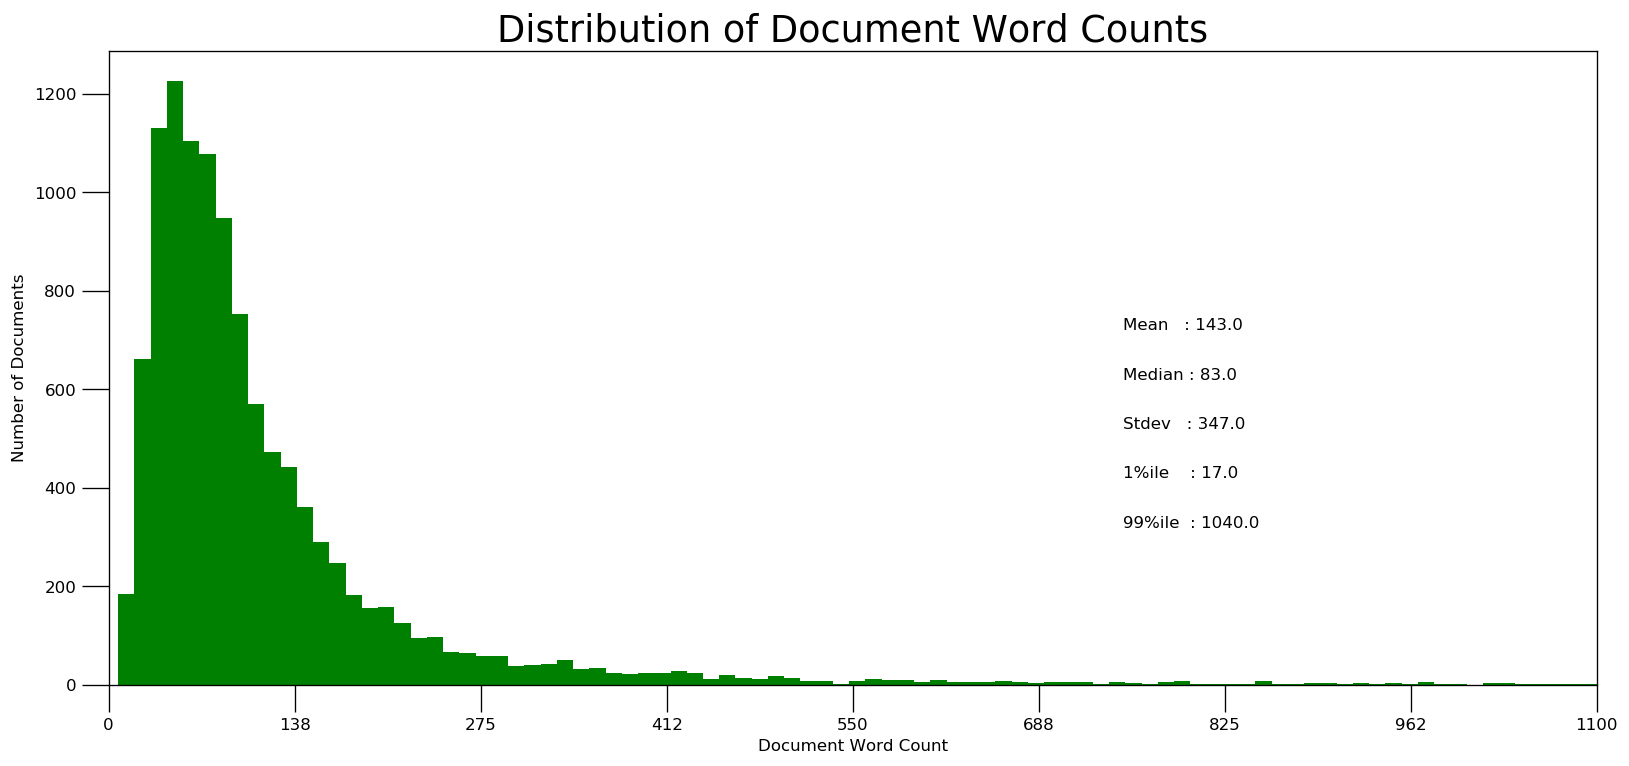

In [35]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=120)
plt.hist(doc_lens, bins = 1000, color='green')
plt.text(750, 720, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 620, "Median : " + str(round(np.median(doc_lens))))
plt.text(750, 520, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750, 420, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750, 320, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1100,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

/home/akash/anaconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


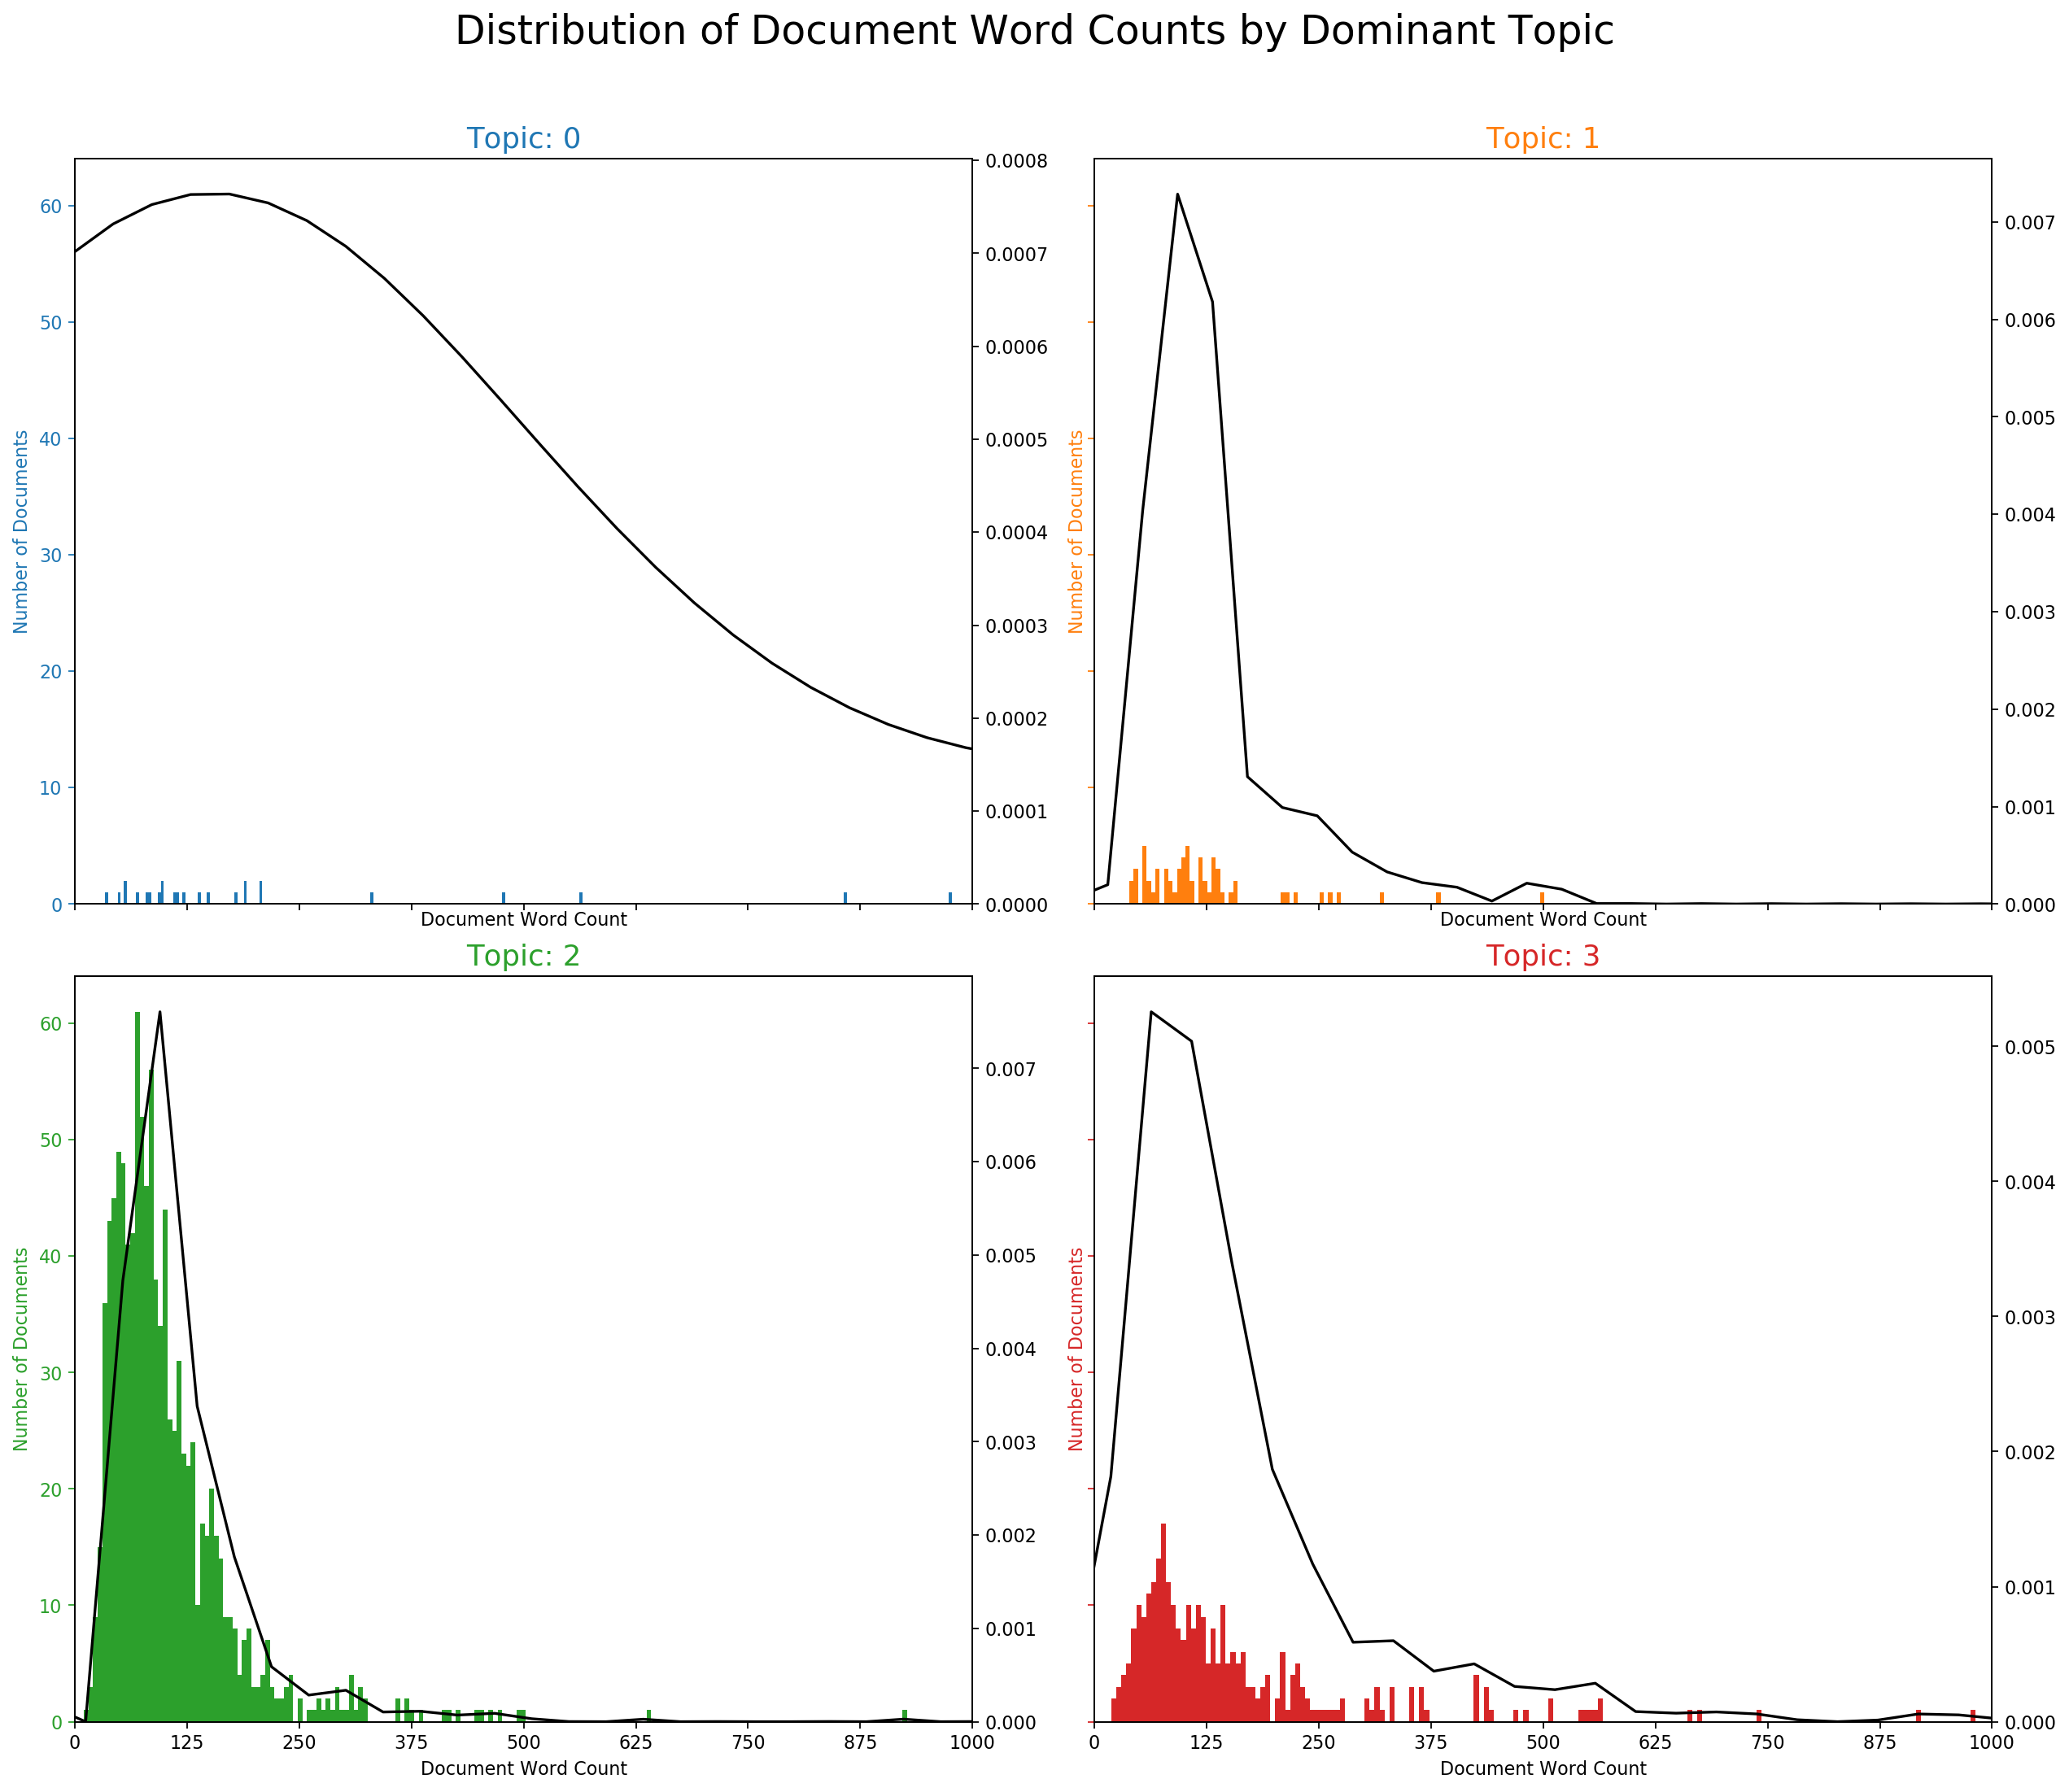

In [36]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

#### t-SNE Clustering Chart

In [38]:
# pip install bokeh

# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2892 samples in 0.004s...
[t-SNE] Computed neighbors for 2892 samples in 0.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2892
[t-SNE] Computed conditional probabilities for sample 2000 / 2892
[t-SNE] Computed conditional probabilities for sample 2892 / 2892
[t-SNE] Mean sigma: 0.083108
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.504360
[t-SNE] Error after 1000 iterations: 0.934977


Loading BokehJS ...

IndexError: index 14 is out of bounds for axis 1 with size 10